In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 780)

In [2]:
MNIST = keras.datasets.mnist
(X_images,X_labels),(y_images,y_lables) = MNIST.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

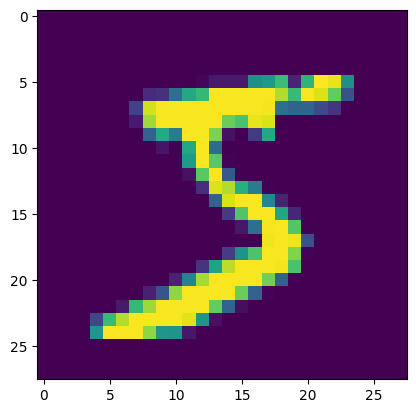

In [3]:
plt.imshow(X_images[0])
print(X_labels[0])
print(X_images[0])

In [4]:
X_images = X_images/255
y_images = y_images/255

5
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

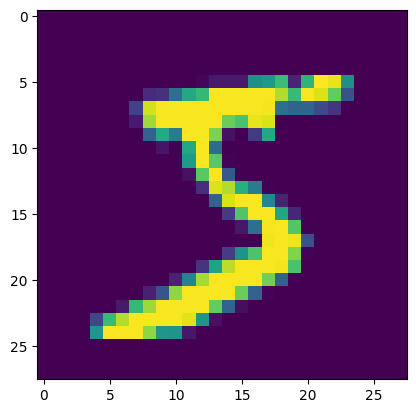

In [5]:
plt.imshow(X_images[0])
print(X_labels[0])
print(X_images[0])

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(X_images,X_labels,epochs=3,validation_data=(X_images,X_labels))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 30ms/step - accuracy: 0.8790 - loss: 0.3910 - val_accuracy: 0.9798 - val_loss: 0.0672
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 25ms/step - accuracy: 0.9715 - loss: 0.0904 - val_accuracy: 0.9876 - val_loss: 0.0424
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 28ms/step - accuracy: 0.9797 - loss: 0.0642 - val_accuracy: 0.9913 - val_loss: 0.0306


In [9]:
model.evaluate(y_images,y_lables)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9812 - loss: 0.0553


[0.04420502483844757, 0.9848999977111816]

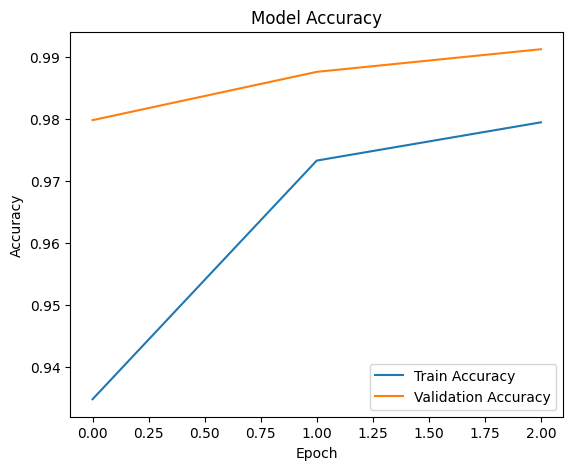

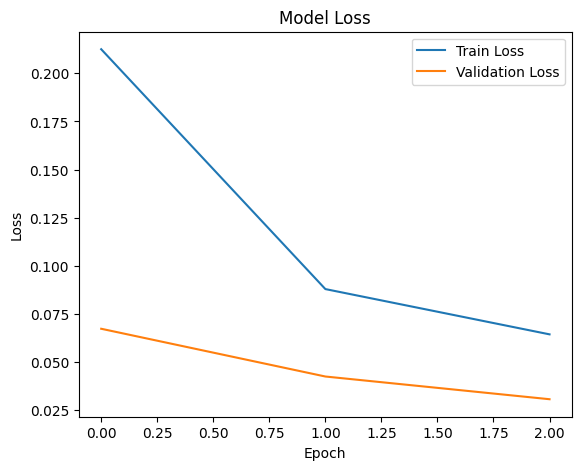

In [10]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model.save('my_model.h5')

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = MNIST.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8662 - loss: 0.4656 - val_accuracy: 0.9680 - val_loss: 0.1229
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9612 - loss: 0.1278 - val_accuracy: 0.9728 - val_loss: 0.0917
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9743 - loss: 0.0841 - val_accuracy: 0.9770 - val_loss: 0.0835
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9809 - loss: 0.0629 - val_accuracy: 0.9792 - val_loss: 0.0779
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9848 - loss: 0.0492 - val_accuracy: 0.9742 - val_loss: 0.0887


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8697 - loss: 0.4564 - val_accuracy: 0.9650 - val_loss: 0.1238
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9617 - loss: 0.1271 - val_accuracy: 0.9725 - val_loss: 0.0927
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9755 - loss: 0.0815 - val_accuracy: 0.9748 - val_loss: 0.0806
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9818 - loss: 0.0616 - val_accuracy: 0.9747 - val_loss: 0.0866
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0464 - val_accuracy: 0.9778 - val_loss: 0.0735
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[ 965    0    2    3    2    1    4    1    2    0]
 [   0 1120    4    0    0    0    1    0   10    0]
 [   4    1 1008    3    1    1    1    5    8    0]
 [   0    0    4  993    1    4    0    3    4    1]
 [   0    0    6    0  956    0    2    1    1   16]
 [   2    0    0   10    1  866

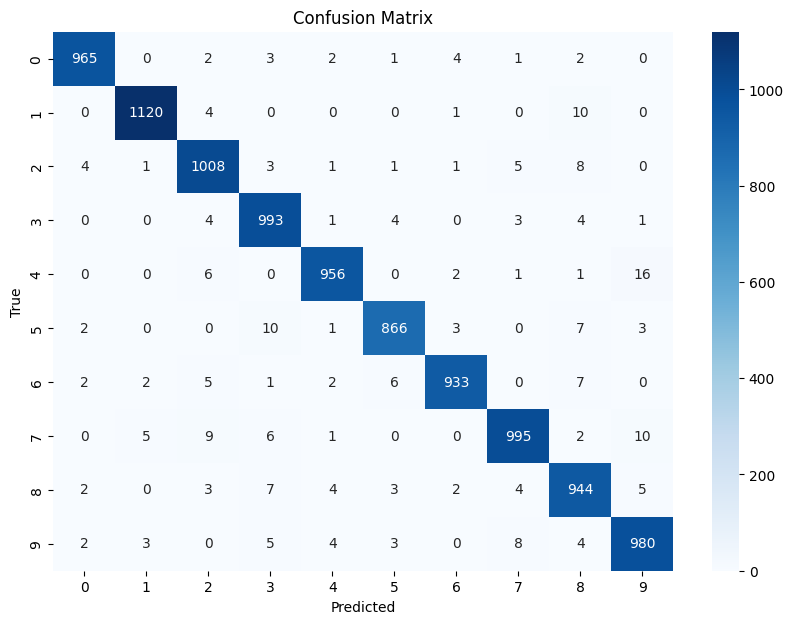

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
(X_train, y_train), (X_test, y_test) = MNIST.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train_one_hot, epochs=5, batch_size=32, validation_split=0.1)

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 965    0    2    3    2    1    4    1    2    0]
 [   0 1120    4    0    0    0    1    0   10    0]
 [   4    1 1008    3    1    1    1    5    8    0]
 [   0    0    4  993    1    4    0    3    4    1]
 [   0    0    6    0  956    0    2    1    1   16]
 [   2    0    0   10    1  866    3    0    7    3]
 [   2    2    5    1    2    6  933    0    7    0]
 [   0    5    9    6    1    0    0  995    2   10]
 [   2    0    3    7    4    3    2    4  944    5]
 [   2    3    0    5    4    3    0    8    4  980]]


In [22]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
# Print F1 score
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9760
